<a href="https://colab.research.google.com/github/AkankshaB123/python/blob/main/Data_Analysis_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [7]:
df1 = pd.read_csv("/content/sample_data/student_performance_data.csv")

In [8]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Student Performance Dataset Analysis

1. Parental Education level distribution for the top 10 and the bottom 10 students based on the highest aggregate score in math, reading and writing
2. Math Score distribution ( Binned in groups of 10 ) by gender and ethnicity
3. Lunch distribution for female and males
4. Pie chart distribution for ethnicity and gender
5. Number of students performing above average in Math and below average in both reading and writing
6. Find other patterns based on performance, and find what impacts Scores

In [9]:
#access math score, reading score, writing score column using loc
df1.loc[:,['math score','reading score','writing score']]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [10]:
#sum score values have individual columns and new column created with sum in a row-wise manner
df1.loc[:,['math score','reading score','writing score']].sum(axis=1)

,0
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


In [11]:
#below command with inplace to make it permanent
df1['aggregate_score'] = df1.loc[:,['math score','reading score','writing score']].sum(axis=1)
df1.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,aggregate_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [12]:
df1.groupby(['parental level of education']).aggregate({'aggregate_score':['mean','min','max']})

aggregate_score          
                                       mean  min  max
parental level of education                          
associate's degree               208.707207   95  300
bachelor's degree                215.771186  117  300
high school                      189.290816   55  287
master's degree                  220.796610  134  293
some college                     205.429204   70  297
some high school                 195.324022   27  297

In [13]:
top_10_students = df1.sort_values(by='aggregate_score', ascending=False).head(10)
top_10_students.groupby(['parental level of education']).aggregate({'aggregate_score':['mean']})

,aggregate_score
,mean
parental level of education,
associate's degree,300.0
bachelor's degree,297.6
master's degree,293.0
some college,296.5
some high school,297.0


In [14]:
bottom_10_students = df1.sort_values(by='aggregate_score', ascending=False).tail(10)
bottom_10_students.groupby(['parental level of education']).aggregate({'aggregate_score':['mean']})

,aggregate_score
,mean
parental level of education,
high school,70.666667
some college,83.000000
some high school,68.000000


In [15]:
#math score binned in groups of 10
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
df1["math_score_bin"] = pd.cut(
    df1["math score"],
    #range(start,stop,step)
    bins=range(0, 110, 10),
    labels=labels, #[ - inclusive ) - exclusive indicators
    right=False #) - exclusive
)

In [16]:
df1['math_score_bin'].value_counts()

,count
math_score_bin,
60-69,268
70-79,216
50-59,188
80-89,135
40-49,95
90-99,51
30-39,26
20-29,10
10-19,2


In [17]:
#Math Score distribution ( Binned in groups of 10 ) by gender and ethnicity
df1.groupby(['gender','race/ethnicity','math_score_bin']).size().unstack()

/tmp/ipython-input-1833263064.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(['gender','race/ethnicity','math_score_bin']).size().unstack()


math_score_bin         0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  \
gender race/ethnicity                                                         
female group A           0      0      0      3      7     12      6      5   
       group B           1      2      2      3     11     25     27     22   
       group C           1      0      3      8     21     38     59     28   
       group D           0      0      3      2     13     26     36     32   
       group E           0      0      0      3      3     10     15     17   
male   group A           0      0      1      1      7     11     16     11   
       group B           0      0      0      2     11     14     27     14   
       group C           0      0      1      2      9     30     36     34   
       group D           0      0      0      1     10     17     36     35   
       group E           0      0      0      1      3      5     10     18   

math_score_bin         80-89  90-99  
gender race/ethnicity                
female group A             2      1  
       group B             7      4  
       group C            17      5  
       group D            13      4  
       group E            12      6  
male   group A             3      2  
       group B            14      4  
       group C            16     11  
       group D            30      3  
       group E            21     11

Score concentration:


1.   Most counts cluster around 40-69 meaning most students score in the mid-range
2.   Very few students appear in 0-19 or 90-99 bins





Gender comparison:


1.   Male tend to have slightly higher counts in upper score bins (70-89) in several race groups
2.   Females tend to cluster more around 50-69 depending on the group



Race/Ethnicity comparison:

Across both genders:
1.   Groups C,D, and E generally have more students in higher score bins
2.   Group A and B have fewer high scorers and students in lower-to-mid ranges

This indicates systematic performance differences across race/ethnicity groups



In [18]:
#Approach 2: Math Score distribution ( Binned in groups of 10 ) by gender and ethnicity using pivot_table
df1.pivot_table(index=['gender','race/ethnicity'],
                columns='math_score_bin',
                values='math score',
                aggfunc='count')

/tmp/ipython-input-1367505378.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df1.pivot_table(index=['gender','race/ethnicity'],


math_score_bin         0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  \
gender race/ethnicity                                                         
female group A           0      0      0      3      7     12      6      5   
       group B           1      2      2      3     11     25     27     22   
       group C           1      0      3      8     21     38     59     28   
       group D           0      0      3      2     13     26     36     32   
       group E           0      0      0      3      3     10     15     17   
male   group A           0      0      1      1      7     11     16     11   
       group B           0      0      0      2     11     14     27     14   
       group C           0      0      1      2      9     30     36     34   
       group D           0      0      0      1     10     17     36     35   
       group E           0      0      0      1      3      5     10     18   

math_score_bin         80-89  90-99  
gender race/ethnicity                
female group A             2      1  
       group B             7      4  
       group C            17      5  
       group D            13      4  
       group E            12      6  
male   group A             3      2  
       group B            14      4  
       group C            16     11  
       group D            30      3  
       group E            21     11

In [ ]:
#Lunch distribution for female and males
df1.groupby(['gender','lunch']).size().unstack()

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316




1.   Most Students are on standard lunch


*   For both genders, a clear majority receive standard lunch:
*   Females: ~63% standard
*   Males: ~66% standard

This suggests that most students in the dataset come from moderate-to-higher income households

2.   Females slightly outnumber males in the dataset


*   Total females = 189 + 329 = 518
*   Total males = 166 + 316 = 482

So the dataset has slightly more female students, which is useful context when interpreting performance comparisons later.

* Note: Food(or lunch status) is used as a proxy for socioeconomic background because it reflects household income and access to resources. Both male and female have very similar socioeconomic backgrounds based on lunch status receiving standard lunch. Any performance gaps by gender are therefore unlikely to be explained by lunch differences alone.





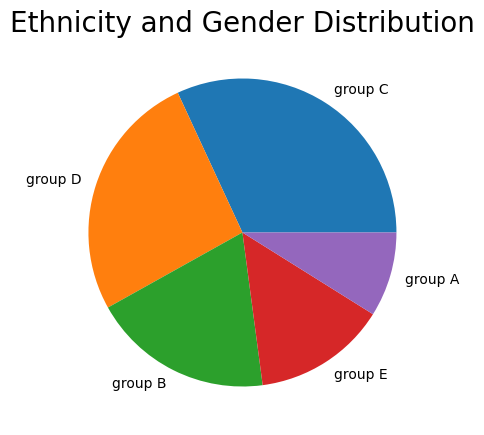

In [43]:
import matplotlib.pyplot as plt

#    .groupby(['gender', 'race/ethnicity'])

plt.figure(figsize=(5,5), dpi = 100)
plt.title("Ethnicity and Gender Distribution", size = 20)
plt.pie(x = pd.Series(df1['race/ethnicity']).value_counts().values,
        labels = df1['race/ethnicity'].value_counts().index)
plt.show()

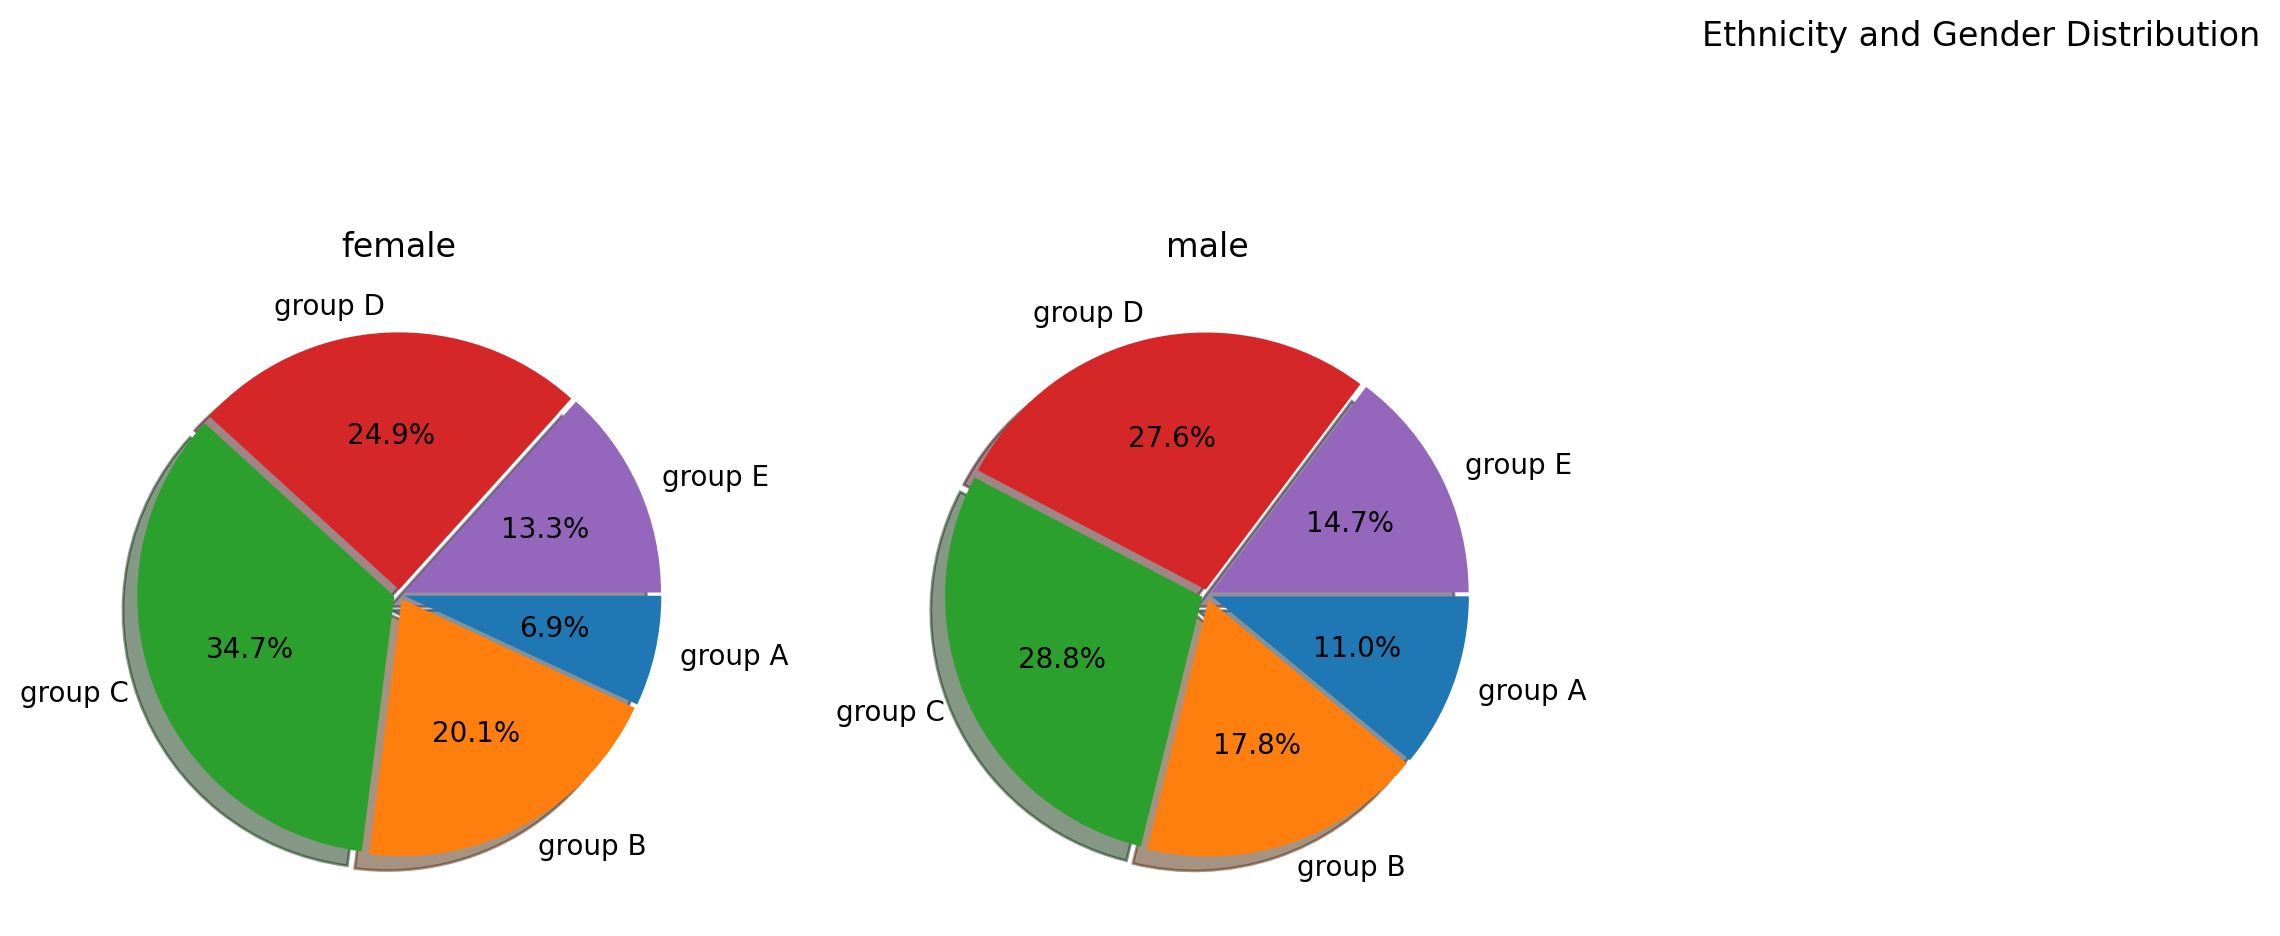

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10), dpi = 200)

fig.suptitle('Ethnicity and Gender Distribution')

# Get the grouped data for plotting
table = df1.groupby(['gender','race/ethnicity']).size().unstack()

# Flatten the axs array for easy iteration
axs_flat = axs.flatten()

for i, (gender, data) in enumerate(table.iterrows()):
    axs_flat[i].pie(x = data.values,
               labels = data.index,
               autopct='%0.1f%%',
               counterclock=False, shadow=True, explode=[0.02]*len(data.index))
    axs_flat[i].set_title(gender)

# Turn off any unused subplots
for i in range(len(table) , len(axs_flat)):
    fig.delaxes(axs_flat[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [19]:
#Number of students performing above average in Math and below average in both reading and writing
df1[(df1['math score']>df1['math score'].mean()) & (df1['reading score'] < df1['reading score'].mean()) & (df1['writing score'] < df1['writing score'].mean())]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,aggregate_score,math_score_bin
26,male,group B,some college,standard,none,69,54,55,178,60-69
51,male,group E,associate's degree,free/reduced,completed,77,69,68,214,70-79
65,male,group B,some high school,standard,none,67,64,61,192,60-69
83,male,group E,associate's degree,standard,none,72,64,63,199,70-79
100,male,group B,some college,standard,none,79,67,67,213,70-79
...,...,...,...,...,...,...,...,...,...,...
935,male,group D,some college,free/reduced,none,70,63,58,191,70-79
936,male,group A,associate's degree,standard,none,67,57,53,177,60-69
942,male,group C,high school,standard,none,81,66,64,211,80-89
955,male,group E,associate's degree,standard,none,72,57,62,191,70-79


In [ ]:
#Find other patterns based on performance, and find what impacts Scores
df1.select_dtypes(include=['number']).corr()

,math score,reading score,writing score,aggregate_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
aggregate_score,0.918746,0.970331,0.965667,1.000000


Key insight
1. Literacy skills reinforce each other. Strong readers tend to be strong writers.
2. Math performance behaves differently from literacy

In [31]:
df1['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


Of the 35% students who completed test preparation course performed better?
on mean level, test preparation has a positive effect on score

In [32]:
#Test preparation has any impact on the score?
df1.groupby(['test preparation course']).aggregate(
    {'aggregate_score':['mean','sum'],
     'math score':['sum','mean'],
     'reading score':['sum','mean'],
     'writing score':['sum','mean']
     })

aggregate_score         math score             \
                                   mean     sum        sum       mean   
test preparation course                                                 
completed                    218.008380   78047      24951  69.695531   
none                         195.116822  125265      41138  64.077882   

                        reading score            writing score             
                                  sum       mean           sum       mean  
test preparation course                                                    
completed                       26454  73.893855         26642  74.418994  
none                            42715  66.534268         41412  64.504673

Hypothesis 2: High performers tend to be consistent across subjects

Hypothesis 3: Low performers often cluster roo
* Students below average in one subject are likely below average in others
* These students are disproportionately from:
1. Free/reduced lunch
2. Lower parental education groups

Hypothesis 4: Interaction effects (important insight)

* Some effects compound:
* Examples:
* Free/reduced lunch + no test prep -> lowest average scores
* Standard lunch + test prep -> highest average scores

Interpretation: Interventions (like test prep) can partially offset socioeconomic disadvantages.